What percentage of Wikipedia articles are longer than 1000 words?

In [45]:
import requests
import time
import math
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
url = "https://en.wikipedia.org/w/api.php"

headers = {
    'User-Agent': 'StatisticsEducationBot/1.0 (Statistics Class Project; educational use)'
}


In [47]:
def get_random_article_title():
    params = {
        "action": "query",
        "list": "random",
        "rnnamespace": 0,
        "rnlimit": 1,
        "format": "json"
    }
    r = requests.get(url, params=params, headers=headers)
    return r.json()["query"]["random"][0]["title"]

def get_article_text(title):
    params = {
        "action": "query",
        "titles": title,
        "prop": "extracts",
        "explaintext": True,
        "format": "json"
    }
    r = requests.get(url, params=params, headers=headers)
    pages = r.json()["query"]["pages"]
    page_id = list(pages.keys())[0]
    return pages[page_id].get("extract", "")

In [48]:
N = 10
records = []

print("=== PART 1: One sample of 10 articles ===\n")

for i in range(N):
    title = get_random_article_title()
    text = get_article_text(title)
    word_count = len(text.split())
    long_article = word_count > 1000   # ← THRESHOLD CHANGED HERE

    records.append({
        "sample_number": i+1,
        "title": title,
        "word_count": word_count,
        "longer_than_1000": long_article
    })

    print(f"{i+1}/{N}: {title} — {word_count} words")
    time.sleep(0.5)

df_part1 = pd.DataFrame(records)
print("\nPART 1 DATAFRAME:")
print(df_part1)

=== PART 1: One sample of 10 articles ===

1/10: Grace Lister — 293 words
2/10: Wlonice, Gmina Wojciechowice — 51 words
3/10: Ando-Kékrénou — 72 words
4/10: Brown-mantled tamarin — 1271 words
5/10: Sleep medicine — 3810 words
6/10: Education in Saudi Arabia — 6340 words
7/10: Ancyloceratidae — 226 words
8/10: Rodolfo Carbone — 80 words
9/10: Scottish Rite Cathedral (Peoria, Illinois) — 353 words
10/10: SS Dewsbury (1910) — 225 words

PART 1 DATAFRAME:
   sample_number                                       title  word_count  \
0              1                                Grace Lister         293   
1              2                Wlonice, Gmina Wojciechowice          51   
2              3                               Ando-Kékrénou          72   
3              4                       Brown-mantled tamarin        1271   
4              5                              Sleep medicine        3810   
5              6                   Education in Saudi Arabia        6340   
6           

In [52]:
print("\n\n=== Repeated sampling ===\n")

articles_per_sample = 10
target_margin_error = 0.10
max_run_time = 5 * 60  

start_time = time.time()
sample_results = []
sample_number = 0

while True:
    sample_number += 1
    word_counts = []

    for _ in range(articles_per_sample):
        title = get_random_article_title()
        text = get_article_text(title)
        wc = len(text.split())
        word_counts.append(wc)
        time.sleep(0.2)

    p = sum(w > 1000 for w in word_counts) / articles_per_sample  
    sample_results.append({
        "sample_id": sample_number,
        "proportion_over_1000": p,
        "mean_word_count": sum(word_counts) / len(word_counts)
    })

    SE = math.sqrt(p * (1 - p) / articles_per_sample)
    margin_error = 1.96 * SE

    print(f"Sample {sample_number}: p={p:.3f}, ME={margin_error:.3f}")

    elapsed = time.time() - start_time
    if margin_error <= target_margin_error:
        print("\nStopping early: Margin of error <= 10%")
        break
    if elapsed >= max_run_time:
        print("\nStopping: 5-minute limit reached")
        break

df_part2 = pd.DataFrame(sample_results)

print("\nPART 2 DATAFRAME:")
print(df_part2)



=== Repeated sampling ===

Sample 1: p=0.200, ME=0.248
Sample 2: p=0.000, ME=0.000

Stopping early: Margin of error <= 10%

PART 2 DATAFRAME:
   sample_id  proportion_over_1000  mean_word_count
0          1                   0.2            775.5
1          2                   0.0            453.6


In [53]:
articles_per_sample = 10      
target_margin_error = 0.10    
max_run_time = 5 * 60         

start_time = time.time()
sample_results = []
sample_number = 0

while True:
    sample_number += 1
    word_counts = []

    for _ in range(articles_per_sample):
        title = get_random_article_title()
        text = get_article_text(title)
        wc = len(text.split())
        word_counts.append(wc)
        time.sleep(0.2)  

    p = sum(w > 1000 for w in word_counts) / articles_per_sample
    sample_results.append({
        "sample_id": sample_number,
        "proportion_over_1000": p,
        "mean_word_count": sum(word_counts)/len(word_counts)
    })

    SE = math.sqrt(p * (1 - p) / articles_per_sample)
    margin_error = 1.96 * SE

    print(f"Sample {sample_number}: p={p:.3f}, ME={margin_error:.3f}")

    elapsed = time.time() - start_time
    if margin_error <= target_margin_error:
        print("\nStopping early: Margin of error ≤ 10%")
        break
    if elapsed >= max_run_time:
        print("\nStopping: 5-minute time limit reached")
        break

df_samples = pd.DataFrame(sample_results)
print("\nSAMPLE RESULTS:")
print(df_samples)

Sample 1: p=0.200, ME=0.248
Sample 2: p=0.200, ME=0.248
Sample 3: p=0.000, ME=0.000

Stopping early: Margin of error ≤ 10%

SAMPLE RESULTS:
   sample_id  proportion_over_1000  mean_word_count
0          1                   0.2            711.0
1          2                   0.2            989.1
2          3                   0.0            267.9


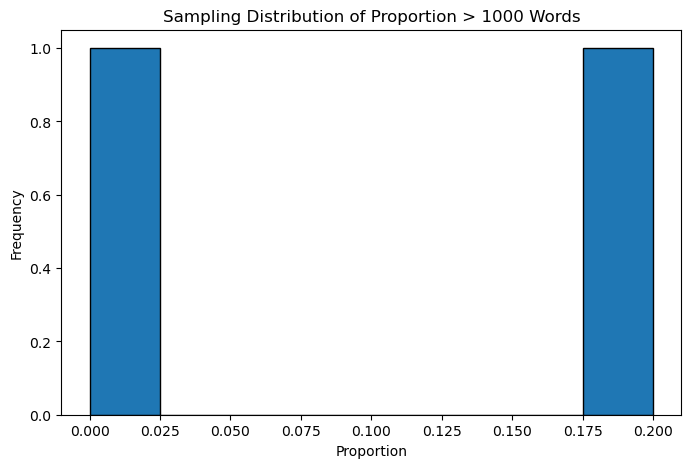

In [54]:
plt.figure(figsize=(8,5))
plt.hist(df_part2["proportion_over_1000"], bins=8, edgecolor="black")
plt.title("Sampling Distribution of Proportion > 1000 Words")
plt.xlabel("Proportion")
plt.ylabel("Frequency")
plt.show()

In [55]:
import math

p_hat = df_part2["proportion_over_1000"].mean()
 
SE = df_part2["proportion_over_1000"].std(ddof=1)

ME = 1.96 * SE

lower = p_hat - ME
upper = p_hat + ME

print("\n=== CONFIDENCE INTERVAL RESULTS ===")
print(f"Sample mean proportion: {p_hat:.4f}")
print(f"Standard Error (SE): {SE:.4f}")
print(f"Margin of Error (95% CI): {ME:.4f}")
print(f"95% CI: [{lower:.4f}, {upper:.4f}]")


=== CONFIDENCE INTERVAL RESULTS ===
Sample mean proportion: 0.1000
Standard Error (SE): 0.1414
Margin of Error (95% CI): 0.2772
95% CI: [-0.1772, 0.3772]


Based on the data I collected, I can estimate that about 10 percent of wikipedia articles are over 1000 words. The mean of my sample proportion is 0.1 with a standard error of 0.1414. My 95 percent confidence interval was roughly from 0 to 0.38 with a margin of error of 0.2772. This evidence indicates that a low amount of wikipedia articles are over 1000 words long, approximately 10 percent. 